In [3]:
#Nama  : Adifa Syahira
#Nim   : 1103202067
#Kelas : TK 44G4

import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

1.Pandas (import pandas as pd): Pandas adalah library yang digunakan untuk manipulasi dan analisis data. Biasanya digunakan untuk membaca data dari berkas CSV atau data tabular lainnya ke dalam DataFrame.

2.NumPy (import numpy as np): NumPy adalah library yang digunakan untuk operasi numerik, terutama dalam melakukan komputasi terhadap array dan matriks.

3.TensorFlow (import tensorflow as tf): TensorFlow adalah framework untuk pembuatan dan pelatihan model machine learning, khususnya neural networks. Dalam kode ini, TensorFlow digunakan untuk membuat dan melatih model CNN.

4.Keras Layers dan Model (from keras.models import Sequential dan from keras.layers import ...): Keras adalah high-level API yang berjalan di atas TensorFlow (atau backend lainnya seperti Theano atau CNTK). Dalam kode ini, Sequential digunakan untuk membuat model neural network secara berurutan, dan layers seperti Conv2D (layer konvolusi 2D), Dense (layer fully connected), Flatten (mengubah array menjadi vektor), Dropout (layer dropout), dan MaxPool2D (layer pooling maksimum) digunakan untuk mendefinisikan arsitektur CNN.

5.Scikit-Learn (from sklearn.model_selection import train_test_split): Scikit-Learn adalah library yang sering digunakan untuk machine learning di Python. Fungsi train_test_split digunakan untuk membagi dataset menjadi subset training dan validation.

6.Pickle (import pickle): Pickle adalah modul Python yang digunakan untuk serialisasi dan deserialisasi objek Python. Dalam kode ini, kemungkinan digunakan untuk menyimpan atau memuat model atau data dari file.

7.Seaborn dan Matplotlib (import seaborn as sns dan import matplotlib.pyplot as plt): Seaborn dan Matplotlib adalah library untuk visualisasi data di Python. Digunakan untuk membuat grafik, plot, dan visualisasi lainnya.

In [6]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\Tugas Data Sains Adifa\MachineLearning\signname.csv")

Seperti biasa untuk membaca data berupa csv

In [11]:
training_file = "C:\\Users\\ASUS\\Downloads\\Tugas Data Sains Adifa\\MachineLearning\\train.p"
testing_file = "C:\\Users\\ASUS\\Downloads\\Tugas Data Sains Adifa\\MachineLearning\\test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)

with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

print("Data loaded")

Data loaded


Kode ini membuka file-file yang berisi data untuk latihan dan pengujian (biasanya data untuk model machine learning). Menggunakan modul pickle, data dari file-file tersebut dimuat ke dalam variabel train untuk data latih dan test untuk data uji. Pesan "Data loaded" dicetak untuk menandakan bahwa proses pemuatan data telah selesai.

In [13]:
sign_name_df = pd.read_csv('C:\\Users\\ASUS\\Downloads\\Tugas Data Sains Adifa\\MachineLearning\\signname.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace=True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


Kode ini membaca file CSV yang berisi informasi tentang nama-nama kelas atau tanda-tanda. Menggunakan Pandas, kode tersebut membuat DataFrame dari file CSV tersebut dengan nama sign_name_df. Selanjutnya, kolom 'SignName' diambil sebagai array numpy dalam variabel SIGN_NAMES. Setelah itu, indeks DataFrame diubah menjadi kolom 'ClassId'. Akhirnya, kode menampilkan sepuluh baris pertama dari DataFrame yang telah dimodifikasi.

In [14]:
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Baris kode tersebut:

1.Mengatur gaya plot Matplotlib menjadi 'ggplot', yang memberikan tampilan serupa dengan ggplot2 dari R.
2.Memastikan plot ditampilkan secara langsung di Jupyter Notebook.
3.Mengoptimalkan tampilan grafik untuk layar dengan resolusi tinggi.

In [15]:
# Define features and labels for training data 
X, y = train['features'], train['labels']
 
# Converting lists into numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)
 
# Define the features and labels for testing data
X_test, y_test = test['features'], test['labels']
 
# Converting lists into numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)


Kode tersebut memuat data latih dan uji dari file yang telah disiapkan sebelumnya. Data tersebut diatur ke dalam variabel X dan y untuk data latih, serta X_test dan y_test untuk data uji. Kemudian, format dari data tersebut diubah dari list ke array numpy untuk digunakan dalam pelatihan dan pengujian model machine learning. Setelah itu, kode menampilkan dimensi dari kedua set data tersebut, yang penting untuk memastikan data telah terbaca dengan benar sebelum digunakan dalam proses pembelajaran maupun evaluasi model.Hasilnya adalah data latih terdiri dari 34799 gambar dengan dimensi 32x32 piksel dan 3 saluran warna (RGB), serta memiliki array labels dengan panjang 34799 yang menyimpan label kelas untuk setiap gambar. Sementara itu, data uji terdiri dari 12630 gambar dengan format yang sama seperti data latih, dimana setiap gambar juga memiliki dimensi 32x32 piksel dengan 3 saluran warna (RGB), dan array labels dengan panjang 12630 yang berisi label kelas untuk setiap gambar.

In [16]:
X, y = train['features'], train['labels']

Baris kode tersebut mengambil fitur (gambar-gambar) dari dataset latih dan menyimpannya dalam variabel X, sementara label (kelas) dari dataset tersebut disimpan dalam variabel y.

In [17]:
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)

(34799, 32, 32, 3) (34799,)


Kode tersebut mengubah data fitur (gambar) dari format list ke dalam array numpy dan menyimpannya dalam variabel data. Sementara itu, label (kelas) juga diubah ke dalam array numpy dan disimpan dalam variabel labels. Perintah print digunakan untuk menampilkan dimensi dari data (data gambar) dan labels (label kelas). Hasil tersebut menunjukkan dimensi dari data gambar dan label pada dataset latih. Data gambar terdiri dari 34799 sampel, masing-masing berukuran 32x32 piksel, dengan setiap gambar memiliki 3 saluran warna (RGB). Sementara itu, array label memiliki panjang 34799, menyimpan label kelas untuk setiap gambar dalam dataset latih.

In [18]:
X_test, y_test = test['features'], test['labels']

Baris kode tersebut mengambil fitur (gambar-gambar) dari dataset pengujian dan menyimpannya dalam variabel X_test, sementara label (kelas) dari dataset tersebut disimpan dalam variabel y_test.

In [20]:
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(12630, 32, 32, 3) (12630,)


Kode tersebut mengubah data fitur (gambar) dari format list ke dalam array numpy untuk dataset pengujian dan menyimpannya dalam variabel X_test. Selain itu, label (kelas) juga diubah ke dalam array numpy dan disimpan dalam variabel y_test. Perintah print digunakan untuk menampilkan dimensi dari X_test (data gambar) dan y_test (label kelas). Hasil tersebut menunjukkan dimensi dari data gambar dan label pada dataset pengujian. Data gambar terdiri dari 12630 sampel, dengan setiap gambar berukuran 32x32 piksel dan memiliki 3 saluran warna (RGB). Sementara itu, array label memiliki panjang 12630, yang berisi label kelas untuk setiap gambar dalam dataset pengujian.

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


Kode tersebut membagi dataset latih menjadi dua bagian: bagian untuk melatih model (X_train dan y_train) dan bagian lainnya untuk validasi (X_val dan y_val).

1.train_test_split(X, y, test_size=0.1, random_state=0): Memisahkan data X (fitur, gambar-gambar) dan y (label kelas) menjadi data latih dan data validasi. Data validasi, yang digunakan untuk menguji performa model selama proses pelatihan, memegang 10% dari data latih.

2.print(X_train.shape, X_val.shape, y_train.shape, y_val.shape): Menampilkan dimensi dari X_train (data latih fitur), X_val (data validasi fitur), y_train (data latih label), dan y_val (data validasi label). Ini penting untuk memastikan bahwa pembagian data berjalan dengan benar sebelum digunakan dalam pelatihan dan validasi model.

Hasil tersebut adalah dimensi dari data yang telah dibagi menjadi data latih (X_train dan y_train) dengan dimensi (31319, 32, 32, 3) dan data validasi (X_val dan y_val) dengan dimensi (3480, 32, 32, 3). Dimensi data latih dan validasi menunjukkan jumlah sampel data serta ukuran dan saluran warna pada setiap gambar. Sementara itu, array label untuk data latih memiliki panjang 31319, sedangkan untuk data validasi memiliki panjang 3480, yang mengindikasikan jumlah label kelas yang sesuai dengan setiap gambar dalam data latih dan validasi.

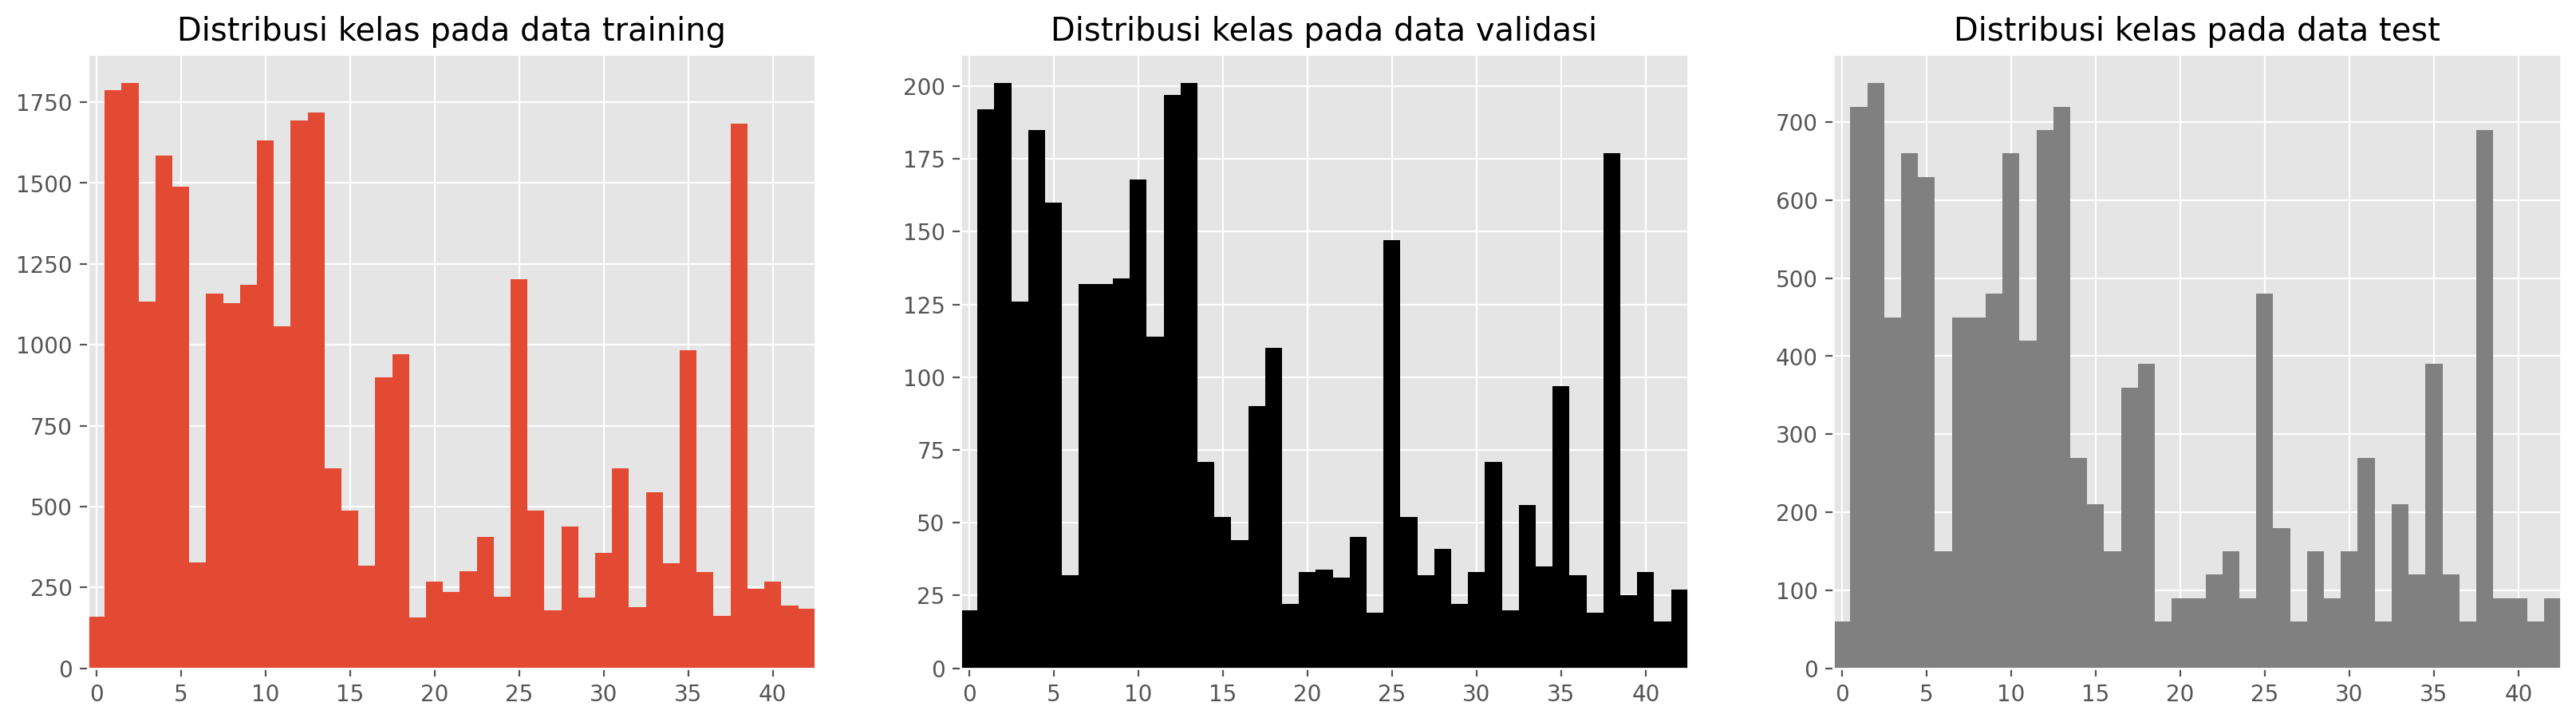

In [22]:
n_labels = np.unique(y_train).size

def hist_data(y_data, title=None, ax=None, **kwargs):
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5, n_labels-0.5)
    if 'label' in kwargs:
        ax.legend()
    if title:
        ax.set_title(title)

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')

Kode itu menggunakan matplotlib untuk membuat histogram yang menunjukkan sebaran kelas pada data latih (y_train), data validasi (y_val), dan data uji (y_test) dalam proyek machine learning. Histogram ini membantu melihat seimbang atau tidaknya distribusi kelas dalam setiap set data.

In [23]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

Kode ini menggunakan fungsi to_categorical dari TensorFlow Keras untuk mengonversi label kelas dari format integer ke dalam format one-hot encoding pada dataset latih (y_train) dan dataset validasi (y_val). Dalam kasus ini, jumlah kelas yang dihasilkan adalah 43, sehingga label kelas diubah menjadi representasi biner dengan panjang 43 untuk setiap sampel, sesuai dengan jumlah kelas yang ada dalam dataset. Representasi ini membantu dalam proses pelatihan model neural network yang membutuhkan label dalam bentuk one-hot encoding.

In [24]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.96):
            print("\nAkurasi telah mencapai >96%. Stop training!")
            self.model.stop_training = True
callbacks = myCallback()

Kode tersebut mendefinisikan sebuah kelas myCallback yang merupakan turunan dari tf.keras.callbacks.Callback. Kelas ini memiliki metode on_epoch_end yang dipanggil oleh Keras pada akhir setiap epoch (siklus pelatihan).

Dalam metode on_epoch_end, terdapat kondisi yang mengecek apakah akurasi pelatihan (logs.get('accuracy')) telah melebihi 96%. Jika kondisi tersebut terpenuhi, pesan akan dicetak bahwa akurasi telah mencapai lebih dari 96%, dan pelatihan model dihentikan dengan mengatur atribut stop_training pada model menjadi True.

Callback ini berguna untuk menghentikan pelatihan model secara otomatis ketika akurasi pelatihan telah mencapai tingkat yang diinginkan (dalam hal ini, lebih dari 96%). Hal ini membantu menghemat waktu dan sumber daya komputasi.

In [25]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

Kode ini mendefinisikan arsitektur sebuah model neural network menggunakan Keras Sequential API. Model ini terdiri dari beberapa lapisan:

1.Convolutional Layers (Conv2D):
Dua set lapisan Conv2D dengan masing-masing 32 dan 64 filter, menggunakan fungsi aktivasi ReLU untuk mengekstraksi fitur-fitur dari gambar.

2.Pooling Layers (MaxPool2D):
Dua lapisan MaxPool2D untuk mengurangi dimensi fitur dengan menggunakan operasi pooling maksimum pada area 2x2.

3.Dropout Layers:
Dua lapisan Dropout untuk mencegah overfitting dengan mematikan sebagian unit (rate=0.25 dan 0.5) secara acak selama proses pelatihan.

4.Flatten Layer:
Lapisan Flatten untuk mengubah matriks hasil konvolusi menjadi vektor agar bisa dihubungkan ke lapisan Dense.

5.Dense Layers (Fully Connected Layers):
Dua lapisan Dense, masing-masing dengan 256 dan 43 neuron. Lapisan terakhir menggunakan fungsi aktivasi softmax untuk menghasilkan output probabilitas dari 43 kelas yang berbeda dalam dataset.
Arsitektur ini umumnya digunakan untuk tugas klasifikasi gambar di mana informasi spasial penting diekstraksi oleh lapisan konvolusi, diikuti dengan lapisan-lapisan dense yang bertugas untuk klasifikasi akhir berdasarkan fitur-fitur yang telah diekstraksi sebelumnya.

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

model.summary() memberikan gambaran ringkas tentang arsitektur model, menampilkan informasi tentang setiap lapisan beserta bentuk outputnya, jumlah parameter yang dapat diubah (trainable), dan total parameter dalam model. Ini membantu melihat struktur keseluruhan model dan jumlah parameter yang akan dipelajari saat proses pelatihan.

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.compile() mengonfigurasi proses pelatihan pada model:

1.Loss Function: Diatur sebagai 'categorical_crossentropy' untuk mengukur kesalahan prediksi model pada tugas klasifikasi multikelas.

2.Optimizer: Dipilih 'adam' sebagai algoritma optimasi yang efisien dalam menyesuaikan bobot model selama pelatihan.

3.Metrics: Menggunakan 'accuracy' untuk mengukur tingkat keakuratan prediksi model pada data uji.

In [28]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])

Epoch 1/25


979/979 [==============================] - 90s 88ms/step - loss: 1.9027 - accuracy: 0.5108 - val_loss: 0.5093 - val_accuracy: 0.8672
Epoch 2/25
979/979 [==============================] - 85s 87ms/step - loss: 0.7594 - accuracy: 0.7716 - val_loss: 0.3041 - val_accuracy: 0.9233
Epoch 3/25
979/979 [==============================] - 83s 84ms/step - loss: 0.5435 - accuracy: 0.8348 - val_loss: 0.1816 - val_accuracy: 0.9474
Epoch 4/25
979/979 [==============================] - 80s 82ms/step - loss: 0.4225 - accuracy: 0.8697 - val_loss: 0.1286 - val_accuracy: 0.9647
Epoch 5/25
979/979 [==============================] - 78s 80ms/step - loss: 0.3686 - accuracy: 0.8869 - val_loss: 0.1151 - val_accuracy: 0.9681
Epoch 6/25
979/979 [==============================] - 79s 81ms/step - loss: 0.3110 - accuracy: 0.9043 - val_loss: 0.0880 - val_accuracy: 0.9741
Epoch 7/25
979/979 [==============================] - 79s 80ms/step - loss: 0.2872 - accuracy: 0.9127 - val_loss: 0.0767 - val_accurac

Kode ini melatih model dengan model.fit(), menggunakan data latih (X_train dan y_train) selama 25 epoch. Setiap iterasi menggunakan 32 sampel data untuk menghitung kesalahan (loss). Selain itu, evaluasi dilakukan pada data validasi (X_val dan y_val) setiap epoch, dengan memanfaatkan callback yang akan menghentikan pelatihan jika akurasi melebihi 96%.

In [29]:
model.save("my_model.h5")

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Perintah model.save("my_model.h5") menyimpan model neural network yang telah dilatih ke dalam file dengan format HDF5 (dengan ekstensi .h5) dengan nama "my_model.h5". Ini memungkinkan untuk menyimpan arsitektur model, bobot yang telah disesuaikan selama pelatihan, dan konfigurasi lainnya ke dalam file yang dapat diakses kembali di masa mendatang untuk penggunaan atau evaluasi lebih lanjut.

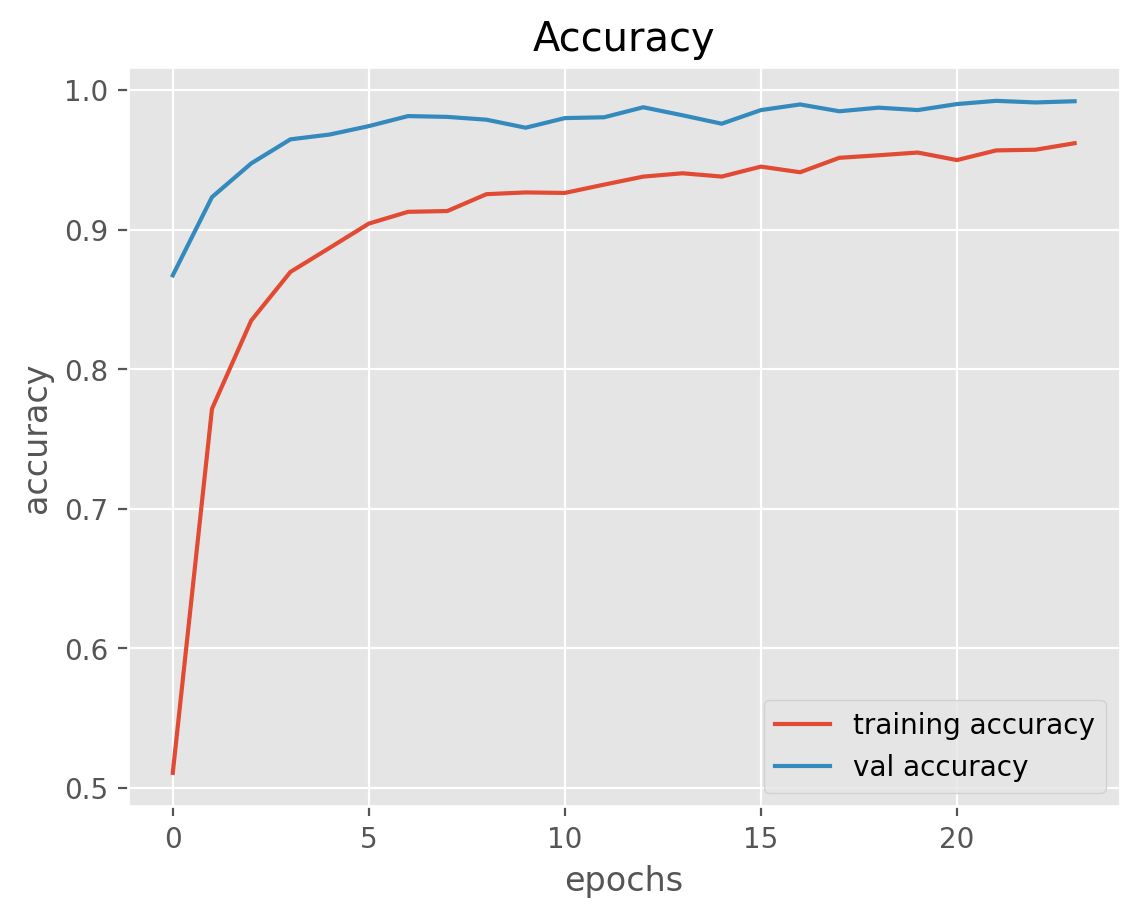

In [30]:
# Plotting graphs for accuracy 
plt.figure(0) 
plt.plot(history.history['accuracy'], label='training accuracy') 
plt.plot(history.history['val_accuracy'], label='val accuracy') 
plt.title('Accuracy') 
plt.xlabel('epochs') 
plt.ylabel('accuracy') 
plt.legend() 
plt.show()

Grafik ini menunjukkan perubahan tingkat akurasi dari data latih dan data validasi pada setiap epoch selama proses pelatihan. Ini membantu dalam memantau peningkatan atau penurunan kinerja model serta mengidentifikasi overfitting atau underfitting.

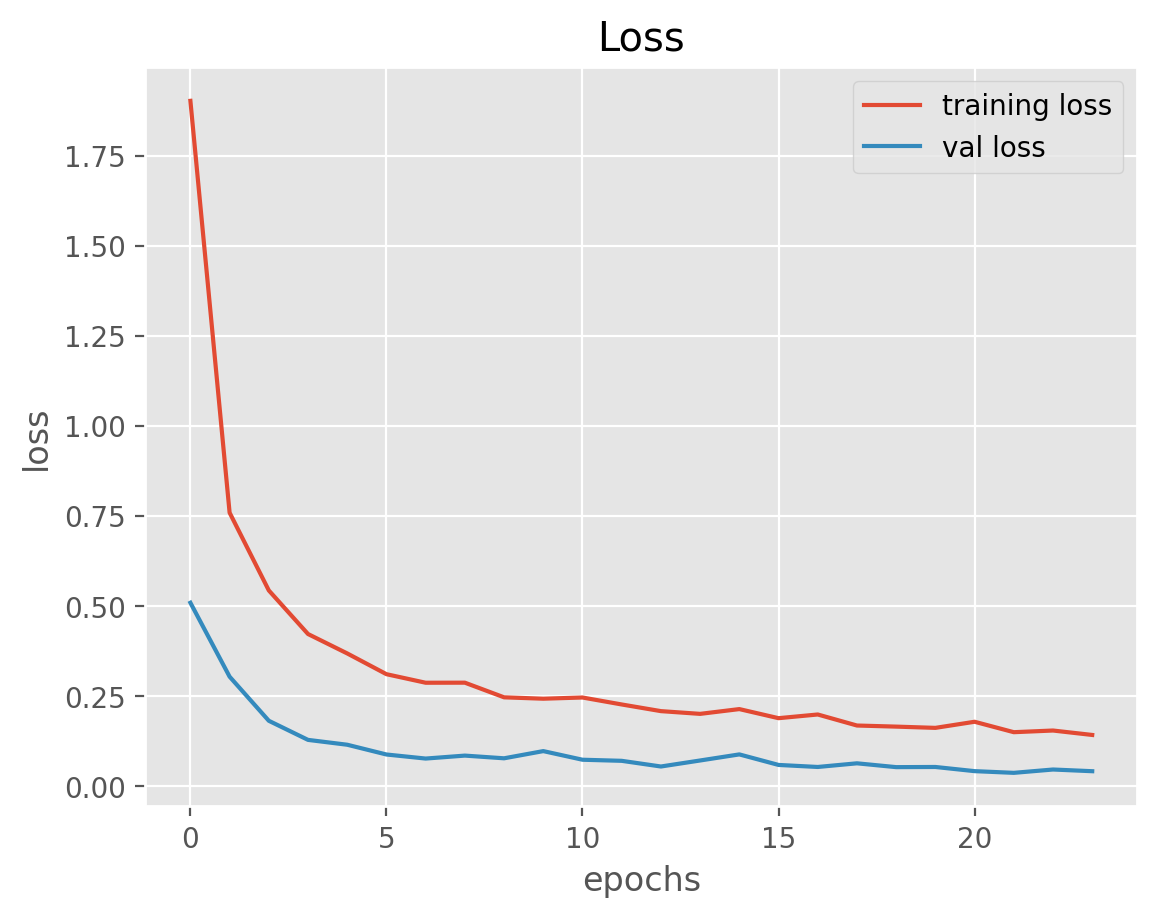

In [31]:
# Plotting graphs for loss
plt.figure(1) 
plt.plot(history.history['loss'], label='training loss') 
plt.plot(history.history['val_loss'], label='val loss') 
plt.title('Loss') 
plt.xlabel('epochs') 
plt.ylabel('loss') 
plt.legend() 
plt.show()

Grafik menunjukkan perubahan nilai loss pada setiap epoch dari data latih dan data validasi. Ini membantu melihat bagaimana model mempelajari pola data serta memantau performa dan kesesuaian model selama pelatihan.

In [32]:
from sklearn.metrics import accuracy_score 

Baris kode from sklearn.metrics import accuracy_score mengimpor fungsi accuracy_score dari pustaka Scikit-learn. Fungsi ini digunakan untuk mengukur akurasi dari model klasifikasi dengan membandingkan label aktual dengan label yang diprediksi oleh model untuk data pengujian. Ini adalah salah satu metrik evaluasi yang umum digunakan dalam evaluasi performa model klasifikasi untuk mengukur seberapa baik model memprediksi kelas-kelas dari data uji.

In [33]:
pred = np.argmax(model.predict(X_test), axis=-1) 
accuracy_score(y_test, pred)

395/395 [==============================] - 3s 7ms/step


0.9505146476642914

Kode tersebut melakukan prediksi terhadap data uji menggunakan model yang telah dilatih (model.predict(X_test)) dan kemudian memilih indeks dengan nilai prediksi tertinggi (np.argmax) sebagai label prediksi.
Selanjutnya, accuracy_score(y_test, pred) menggunakan fungsi accuracy_score dari Scikit-learn untuk membandingkan label aktual (y_test) dengan label yang telah diprediksi (pred). Fungsi ini menghitung dan mengembalikan nilai akurasi dari prediksi model terhadap data uji, memberikan gambaran seberapa baik model memprediksi kelas-kelas yang benar dalam data

395/395 [==============================] - 3s 7ms/step 
Pesan tersebut menunjukkan proses pelatihan model dengan informasi terkait jumlah batch (395) dan waktu yang dibutuhkan untuk setiap iterasi (3s), diukur dalam milidetik (ms). Ini adalah output yang umumnya muncul saat melatih model neural network, memberikan informasi tentang kemajuan pelatihan model pada setiap iterasi (batch) serta waktu yang digunakan untuk setiap langkah pelatihan. 

Dengan hasilnya adalah 0.9505146476642914 menunjukkan nilai hasil dari suatu pengukuran atau evaluasi. Nilai 0.9505 atau sekitar 95.05% dapat dianggap sebagai tingkat keberhasilan dari hasil yang diberikan. Dalam konteks evaluasi model, nilai tersebut mengindikasikan bahwa model berhasil memprediksi dengan benar sekitar 95.05% dari data uji yang digunakan untuk pengujian atau evaluasi model. Semakin tinggi nilai ini, semakin baik kinerja atau keakuratan model dalam melakukan prediksi terhadap data yang tidak pernah dilihat sebelumnya (data uji).